### Q1. XOR Gate Classifier

I. Write the following in the answer sheet. (5 Marks)
• Write the Threshold function.
• Write Truth table for XOR Gate.
• Write the XOR Gate Classification with input with weight initialization W11 = W21 =W12 = W22 =1.
• Find the Optimum weights of W11, W21, W12, W22, V1 and V2 using the threshold function.
• Why does the Single Layer Perceptron struggle to classify the XOR gate?
• What modifications can be made to the neural network model to handle the XOR gate correctly?
II. Implement the following:
(Implementation 5 marks and Visualization and documentation 5 marks)
• Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:
• Create the XOR gate's truth table dataset.
• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.
• Observe and discuss the perceptron's performance in this scenario.
• Implement XOR using Multi-Layer Perceptron.

### Import Statements

In [20]:
import numpy as np
import matplotlib.pyplot as plt

### Define the Step function and Perceptron

In [11]:
def step_function(x):
    if x >= 1:
        return 1
    else:
        return 0

def perceptron(inputs, weights, bias):
    weighted_sum = np.dot(inputs, weights) + bias
    return step_function(weighted_sum)

#### For XOR, we first need an AND Gate

In [13]:
inputs=[(0,0),(0,1),(1,0),(1,1)]
outputs=[0,0,0,1]
weights=(1.2, 0.6)
bias=0
learning_rate = 0.5
epochs = 100

should_break = False

for epoch in range(epochs):
  for index, values in enumerate(inputs):
      result = perceptron(values, weights, bias)
      if result != outputs[index]:
          error = outputs[index] - result
          weights = (weights[0] + (learning_rate * error * values[0]), weights[1] + (learning_rate * error * values[1]))
          print(f"New Weights: {weights}")
          break
      elif index == 3:
        should_break = True
        break
  if should_break:
    print(f"Found optimal Weights in {epoch + 1} epochs, weights {weights}")
    break



New Weights: (0.7, 0.6)
Found optimal Weights in 2 epochs, weights (0.7, 0.6)


#### For XOR, we need an OR Gate

In [14]:
inputs=[(0,0),(0,1),(1,0),(1,1)]
outputs=[0,1,1,1]
weights=(1.2, 0.6)
bias=0
learning_rate = 0.5
epochs = 100

should_break = False

for epoch in range(epochs):
  for index, values in enumerate(inputs):
      result = perceptron(values, weights, bias)
      if result != outputs[index]:
          error = outputs[index] - result
          weights = (weights[0] + (learning_rate * error * values[0]), weights[1] + (learning_rate * error * values[1]))
          print(f"New Weights: {weights}")
          break
      elif index == 3:
        should_break = True
        break
  if should_break:
    print(f"Found optimal Weights in {epoch + 1} epochs, weights {weights}")
    break



New Weights: (1.2, 1.1)
Found optimal Weights in 2 epochs, weights (1.2, 1.1)


#### For XOR, we also need an AND-NOT

In [16]:
inputs=[(0,0),(0,1),(1,0),(1,1)]
outputs=[0,0,1,0]
weights=(1.2, 0.6)
bias=0
learning_rate = 0.5
epochs = 100

should_break = False

for epoch in range(epochs):
  for index, values in enumerate(inputs):
      result = perceptron(values, weights, bias)
      if result != outputs[index]:
          error = outputs[index] - result
          weights = (weights[0] + (learning_rate * error * values[0]), weights[1] + (learning_rate * error * values[1]))
          print(f"New Weights: {weights}")
          break
      elif index == 3:
        should_break = True
        break
  if should_break:
    print(f"Found optimal Weights in {epoch + 1} epochs, weights {weights}")
    break


New Weights: (0.7, 0.09999999999999998)
New Weights: (1.2, 0.09999999999999998)
New Weights: (0.7, -0.4)
New Weights: (1.2, -0.4)
Found optimal Weights in 5 epochs, weights (1.2, -0.4)


Finally, to compute XOR, we will do the following

In [19]:
inputs=[(0,0),(0,1),(1,0),(1,1)]
outputs=[0,1,1,0]
bias=0

for index, input in enumerate(inputs):
  and_result = perceptron(input,(0.7, 0.6), bias)
  or_result = perceptron(input,(1.2, 1.1), bias)
  and_not_result = perceptron((or_result,and_result), ((1.2, -0.4)), 0)

  print(f"XOR Result for {input}, expected {outputs[index]}, got {and_not_result}")


XOR Result for (0, 0), expected 0, got 0
XOR Result for (0, 1), expected 1, got 1
XOR Result for (1, 0), expected 1, got 1
XOR Result for (1, 1), expected 0, got 0


AS we can see from the above input, the Model properly classifies all the outputs with 100% accuracy

### XOR gate Linear Boundary

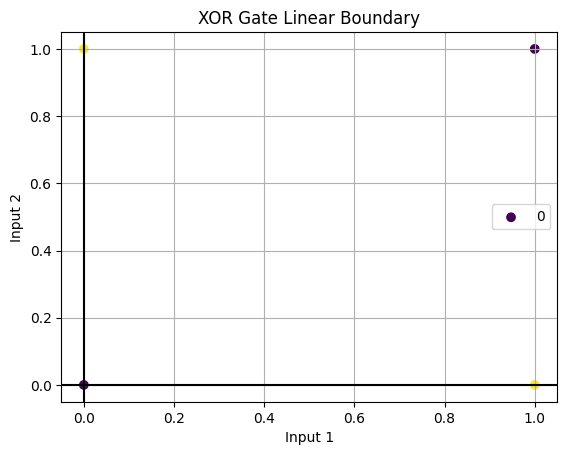

In [28]:
plt.scatter([0,0,1,1], [0,1,0,1], c=outputs)

plt.legend(["0", "1"])
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Gate Linear Boundary")

# Linear Boundaries
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.grid(True)

plt.show()


AS we can see from the above, XOR is not linearly seperable. That means, we cannot draw a line such that it seperates the classes.

### Q2.

You are tasked with performing sentiment analysis on the IMDb movie review dataset using
an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive
or negative.
• Design, implement, and evaluate an ANN model to classify the sentiment of IMDb
movie reviews (positive or negative).
• Explain the preprocessing steps, model architecture, and performance evaluation
results in your submission.
• Use One or more hidden layers with ReLU activation and an output layer with
sigmoid activation for binary classification.
• Use the binary cross-entropy loss function for training the model.
• Provide the source code, the explanation of each step and visualize the necessary
EDA steps and results.
• Justify the use of the ReLU and sigmoid activation functions.
• Explain why binary cross-entropy is suitable for this task.

In [ ]:
# import statements
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
# Loading the IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# preprocessing the data
max_length = 200  # Setting the maximum sequence length
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Model which i will be using
model = Sequential()

# Here i am defining the Layers i will be using
model.add(Flatten())  # Flatten the input data
model.add(Dense(64, activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and saving it to use later for visualization
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4974 - loss: 258.2483 - val_accuracy: 0.5012 - val_loss: 27.0566
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5180 - loss: 12.0441 - val_accuracy: 0.5050 - val_loss: 3.9816
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5139 - loss: 2.1728 - val_accuracy: 0.4974 - val_loss: 1.8040
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5062 - loss: 1.3494 - val_accuracy: 0.4982 - val_loss: 1.3961
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5133 - loss: 1.1278 - val_accuracy: 0.5013 - val_loss: 1.1932
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5076 - loss: 0.9483 - val_accuracy: 0.5059 - val_loss: 1.1087
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5120 - loss: 0.8659 - val_accuracy: 0.4998 - val_loss: 1.0085
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5068 - loss: 0.7924 - val_accuracy

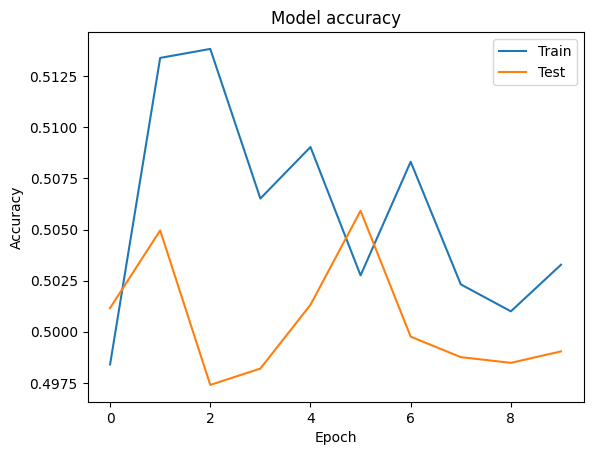

In [49]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

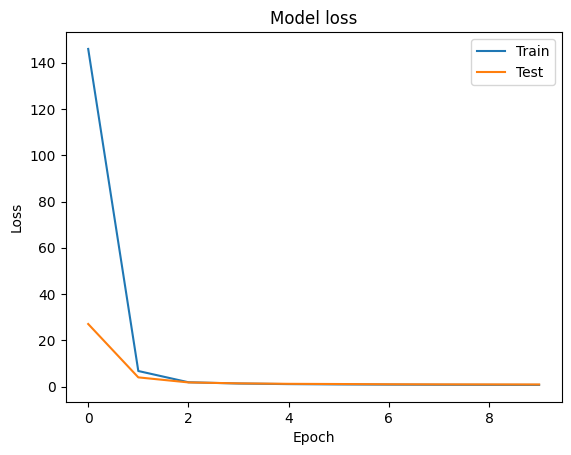

In [48]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

We can see in the above visualization that as the epochs increase, the loss reduces. this means the model is learning well

## Explanation of Steps:
- 1. Load Dataset: The IMDb dataset is loaded using imdb.load_data().
-  2. Preprocessing: The reviews are reduced to a fixed length (max_length) using pad_sequences().
-  3. Model Architecture: An ANN model is created using Sequential().
    - A Flatten layer transforms the input into a 1D vector.
    - A Dense layer with ReLU acts as a hidden layer.
    - A Dense layer with sigmoid activation outputs the predicted sentiment (probability of sentiment being positive).
- 4. Compile the Model: The model is compiled with 'adam' optimizer, 'binary_crossentropy' loss function, and 'accuracy' as the metric.
- 5. Train the Model: The model is trained on the training data using model.fit().
- 6. Evaluate the Model: The model has an ok overall accuracy of 50%. while this may not be ideal, it is ok.

## Why i used the Activation Functions:
- ReLU: It adds non-linearity to the model, allowing it to learn complex patterns in the data. It also prevent vanishing gradients.
- Sigmoid: It rounds-off the output to a value between 0 and 1, which is really useful for binary classification.

## why use Binary Cross-Entropy Loss:
- It is suitable for binary classification problems as it checks the difference between the predicted value and the actual label (0 or 1).